In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, numpy.random as npr
import scipy.stats
npr.seed(1)

In [2]:
def prior1(tau):
    # Prior distribution Uniform(0,20)
    return scipy.stats.uniform(0, 20).pdf(tau)

def prior2(tau):
    # Prior distribution
    return scipy.stats.uniform(0.5, 2).pdf(tau)

def prior3(tau):
    # Prior distribution
    return scipy.stats.norm(1.2, 0.2).pdf(tau)

prior = prior2

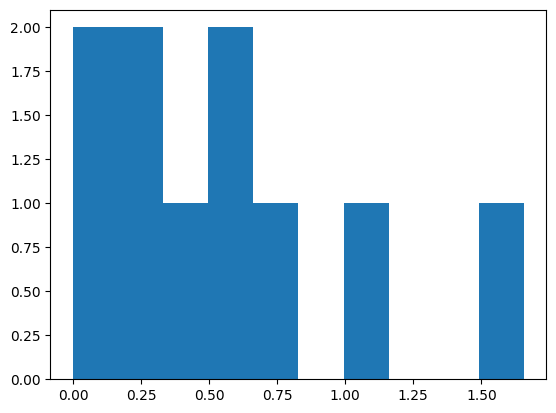

In [3]:
def getData(N):
    # Generate many datapoints from the exponential distribution
    # The true distribution is ~exp(-t/1.3)
    tauTrue = 1.3
    return scipy.stats.expon(0, tauTrue).rvs(N)
plt.hist(getData(10));

Text(0.5, 0, 'tau')

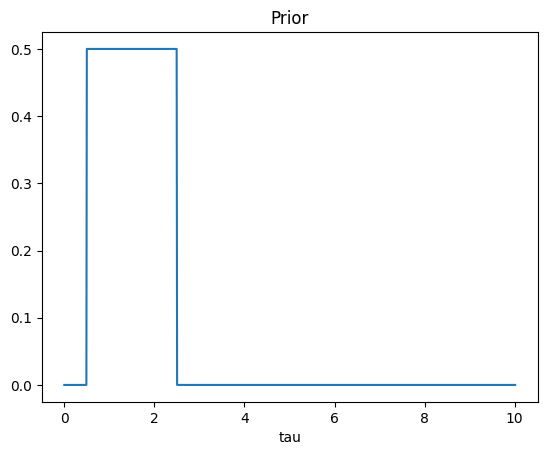

In [9]:

def likelihoodOne(tau, x):
    # evaluate the likelihood of the data x given tau
    # function of both: parameters and the data
    # PDF for the data for any value of parameters
    return scipy.stats.expon(0, tau).pdf(x)

def posteriorMany(tau, data=None):
    #posterior on tau after receiving multiple data points
    post = prior(tau)
    for curd in data:
        post  = post * likelihoodOne(tau, curd)
    return post

xgrid = np.linspace(-0.00001, 10.01, 1000)


plt.plot(xgrid,prior(xgrid)) # this is our prior
plt.title('Prior')
plt.xlabel('tau')


In [11]:
np.random.seed(1)
data1 = getData(1) # first datapoint
print (data1)

[0.70148759]


Text(0.5, 0, 'tau')

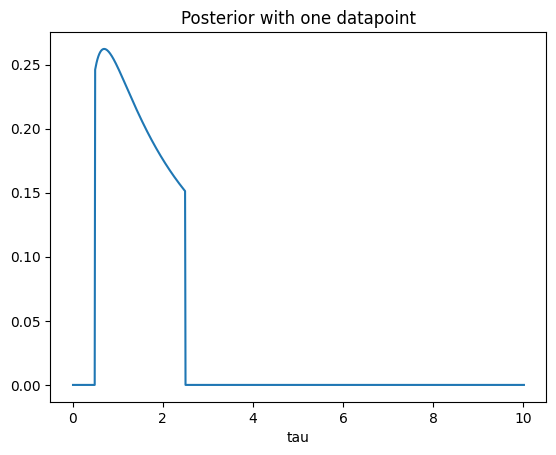

In [12]:
plt.plot(xgrid, posteriorMany(xgrid,data1))
plt.title('Posterior with one datapoint')
plt.xlabel('tau')
# Our information about tau after first datapoint arrived

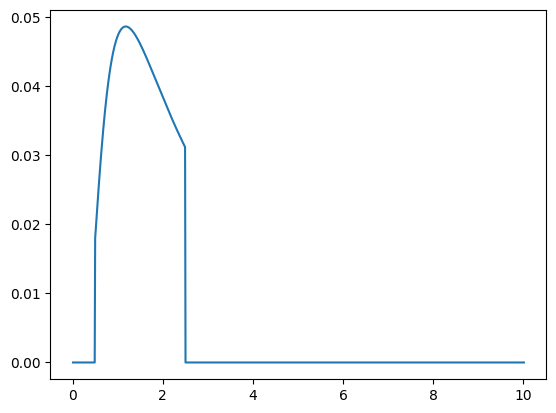

In [13]:
np.random.seed(1)

moredata = getData(2)
plt.plot(xgrid, posteriorMany(xgrid,moredata))

(0.0, 10.0)

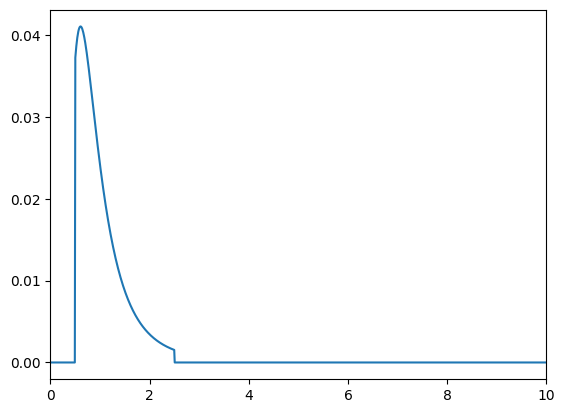

In [14]:
np.random.seed(1)

moredata = getData(5)
plt.plot(xgrid, posteriorMany(xgrid,moredata))
plt.xlim(0,10)

(0.0, 3.0)

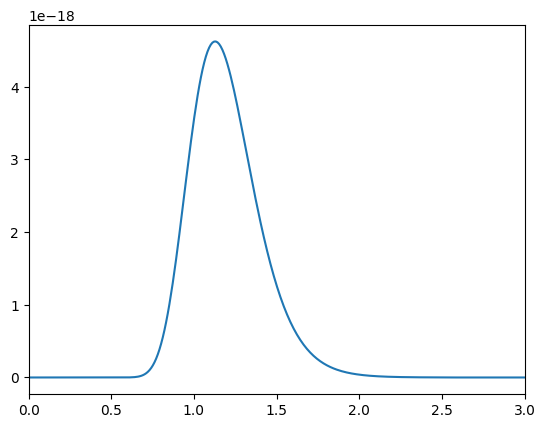

In [15]:
np.random.seed(1)

moredata = getData(35)
plt.plot(xgrid, posteriorMany(xgrid,moredata))
plt.xlim(0,3)